In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [23]:
df=pd.read_csv('data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199 entries, 0 to 13198
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_0   13199 non-null  float64
 1   attribute_1   13199 non-null  float64
 2   attribute_2   13199 non-null  float64
 3   attribute_3   13199 non-null  float64
 4   attribute_4   13199 non-null  float64
 5   attribute_5   13199 non-null  float64
 6   attribute_6   13199 non-null  float64
 7   attribute_7   13199 non-null  float64
 8   attribute_8   13199 non-null  float64
 9   attribute_9   13199 non-null  float64
 10  attribute_10  13199 non-null  float64
 11  attribute_11  13199 non-null  float64
 12  attribute_12  13199 non-null  float64
 13  attribute_13  13199 non-null  float64
 14  attribute_14  13199 non-null  float64
 15  attribute_15  13199 non-null  float64
 16  attribute_16  13199 non-null  float64
 17  attribute_17  13199 non-null  float64
 18  attribute_18  13199 non-nu

In [3]:
df.describe()

attribute_0   attribute_1   attribute_2   attribute_3   attribute_4  \
count  13199.000000  13199.000000  13199.000000  13199.000000  13199.000000   
mean       0.463345      0.510979      0.509752      0.603272      0.603322   
std        0.077025      0.090347      0.081337      0.015419      0.015354   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.430191      0.474750      0.475724      0.597164      0.597268   
50%        0.469598      0.526603      0.519542      0.601827      0.601839   
75%        0.505241      0.561928      0.555115      0.609065      0.608985   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        attribute_5   attribute_6   attribute_7   attribute_8   attribute_9  \
count  13199.000000  13199.000000  13199.000000  13199.000000  13199.000000   
mean       0.998750      0.796970      0.808855      0.303242      0.781167   
std        0.009361      0.009340      0.009934      0.008322      0.009197   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.998860      0.797077      0.809006      0.303231      0.781254   
50%        0.998968      0.797336      0.809264      0.303447      0.781509   
75%        0.999036      0.797477      0.809386      0.303536      0.781642   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  attribute_86  attribute_87  attribute_88  attribute_89  \
count  ...  1.319900e+04  13199.000000  13199.000000  13199.000000   
mean   ...  3.391346e+07      0.623808      0.603233      0.833269   
std    ...  4.599172e+08      0.009538      0.015365      0.043625   
min    ...  0.000000e+00      0.000000      0.000000      0.000000   
25%    ...  1.220500e-03      0.623218      0.597158      0.835381   
50%    ...  3.154000e-03      0.623722      0.601813      0.839617   
75%    ...  7.975000e-03      0.624063      0.609004      0.841443   
max    ...  9.820000e+09      1.000000      1.000000      1.000000   

       attribute_90  attribute_91  attribute_92  attribute_93  attribute_94  \
count  13199.000000  13199.000000  13199.000000       13199.0  13199.000000   
mean       0.287056      0.027964      0.565271           1.0      0.036217   
std        0.037132      0.014414      0.010166           0.0      0.046570   
min        0.000000      0.000000      0.000000           1.0      0.000000   
25%        0.278247      0.026638      0.564507           1.0      0.018340   
50%        0.282051      0.026791      0.565167           1.0      0.023782   
75%        0.287249      0.026916      0.565831           1.0      0.036628   
max        1.000000      1.000000      1.000000           1.0      1.000000   

              class  
count  13199.000000  
mean       0.500038  
std        0.500019  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 96 columns]

In [4]:
df.sample(4)

attribute_0  attribute_1  attribute_2  attribute_3  attribute_4  \
5528     0.511724     0.571740     0.568928     0.612808     0.612592   
4496     0.511919     0.578064     0.566465     0.600773     0.600794   
4424     0.522839     0.584278     0.572140     0.596910     0.596910   
6083     0.446400     0.503980     0.495904     0.624584     0.624584   

      attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  ...  \
5528     0.999097     0.797564     0.809480     0.303562     0.781745  ...   
4496     0.998989     0.797466     0.809383     0.303615     0.781639  ...   
4424     0.998986     0.797419     0.809338     0.303540     0.781598  ...   
6083     0.998555     0.796850     0.808787     0.303447     0.781004  ...   

      attribute_86  attribute_87  attribute_88  attribute_89  attribute_90  \
5528      0.002724      0.623946      0.612805      0.841964      0.281213   
4496      0.007695      0.623966      0.600769      0.841927      0.278742   
4424      0.075443      0.623955      0.596908      0.843006      0.284516   
6083      0.000488      0.624315      0.624584      0.839280      0.277432   

      attribute_91  attribute_92  attribute_93  attribute_94  class  
5528      0.026872      0.565518             1      0.025053      0  
4496      0.026833      0.565349             1      0.034072      0  
4424      0.026842      0.565390             1      0.020075      0  
6083      0.026653      0.564403             1      0.045428      0  

[4 rows x 96 columns]

In [5]:
df.isna().sum()

attribute_0     0
attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
               ..
attribute_91    0
attribute_92    0
attribute_93    0
attribute_94    0
class           0
Length: 96, dtype: int64

In [6]:
df.columns

Index(['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3',
       'attribute_4', 'attribute_5', 'attribute_6', 'attribute_7',
       'attribute_8', 'attribute_9', 'attribute_10', 'attribute_11',
       'attribute_12', 'attribute_13', 'attribute_14', 'attribute_15',
       'attribute_16', 'attribute_17', 'attribute_18', 'attribute_19',
       'attribute_20', 'attribute_21', 'attribute_22', 'attribute_23',
       'attribute_24', 'attribute_25', 'attribute_26', 'attribute_27',
       'attribute_28', 'attribute_29', 'attribute_30', 'attribute_31',
       'attribute_32', 'attribute_33', 'attribute_34', 'attribute_35',
       'attribute_36', 'attribute_37', 'attribute_38', 'attribute_39',
       'attribute_40', 'attribute_41', 'attribute_42', 'attribute_43',
       'attribute_44', 'attribute_45', 'attribute_46', 'attribute_47',
       'attribute_48', 'attribute_49', 'attribute_50', 'attribute_51',
       'attribute_52', 'attribute_53', 'attribute_54', 'attribute_55',
       'attribut

In [7]:
df.shape

(13199, 96)

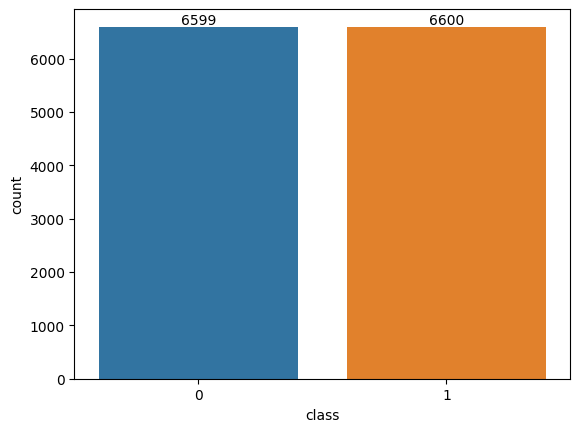

In [8]:
ax=sns.countplot(data=df,x='class')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

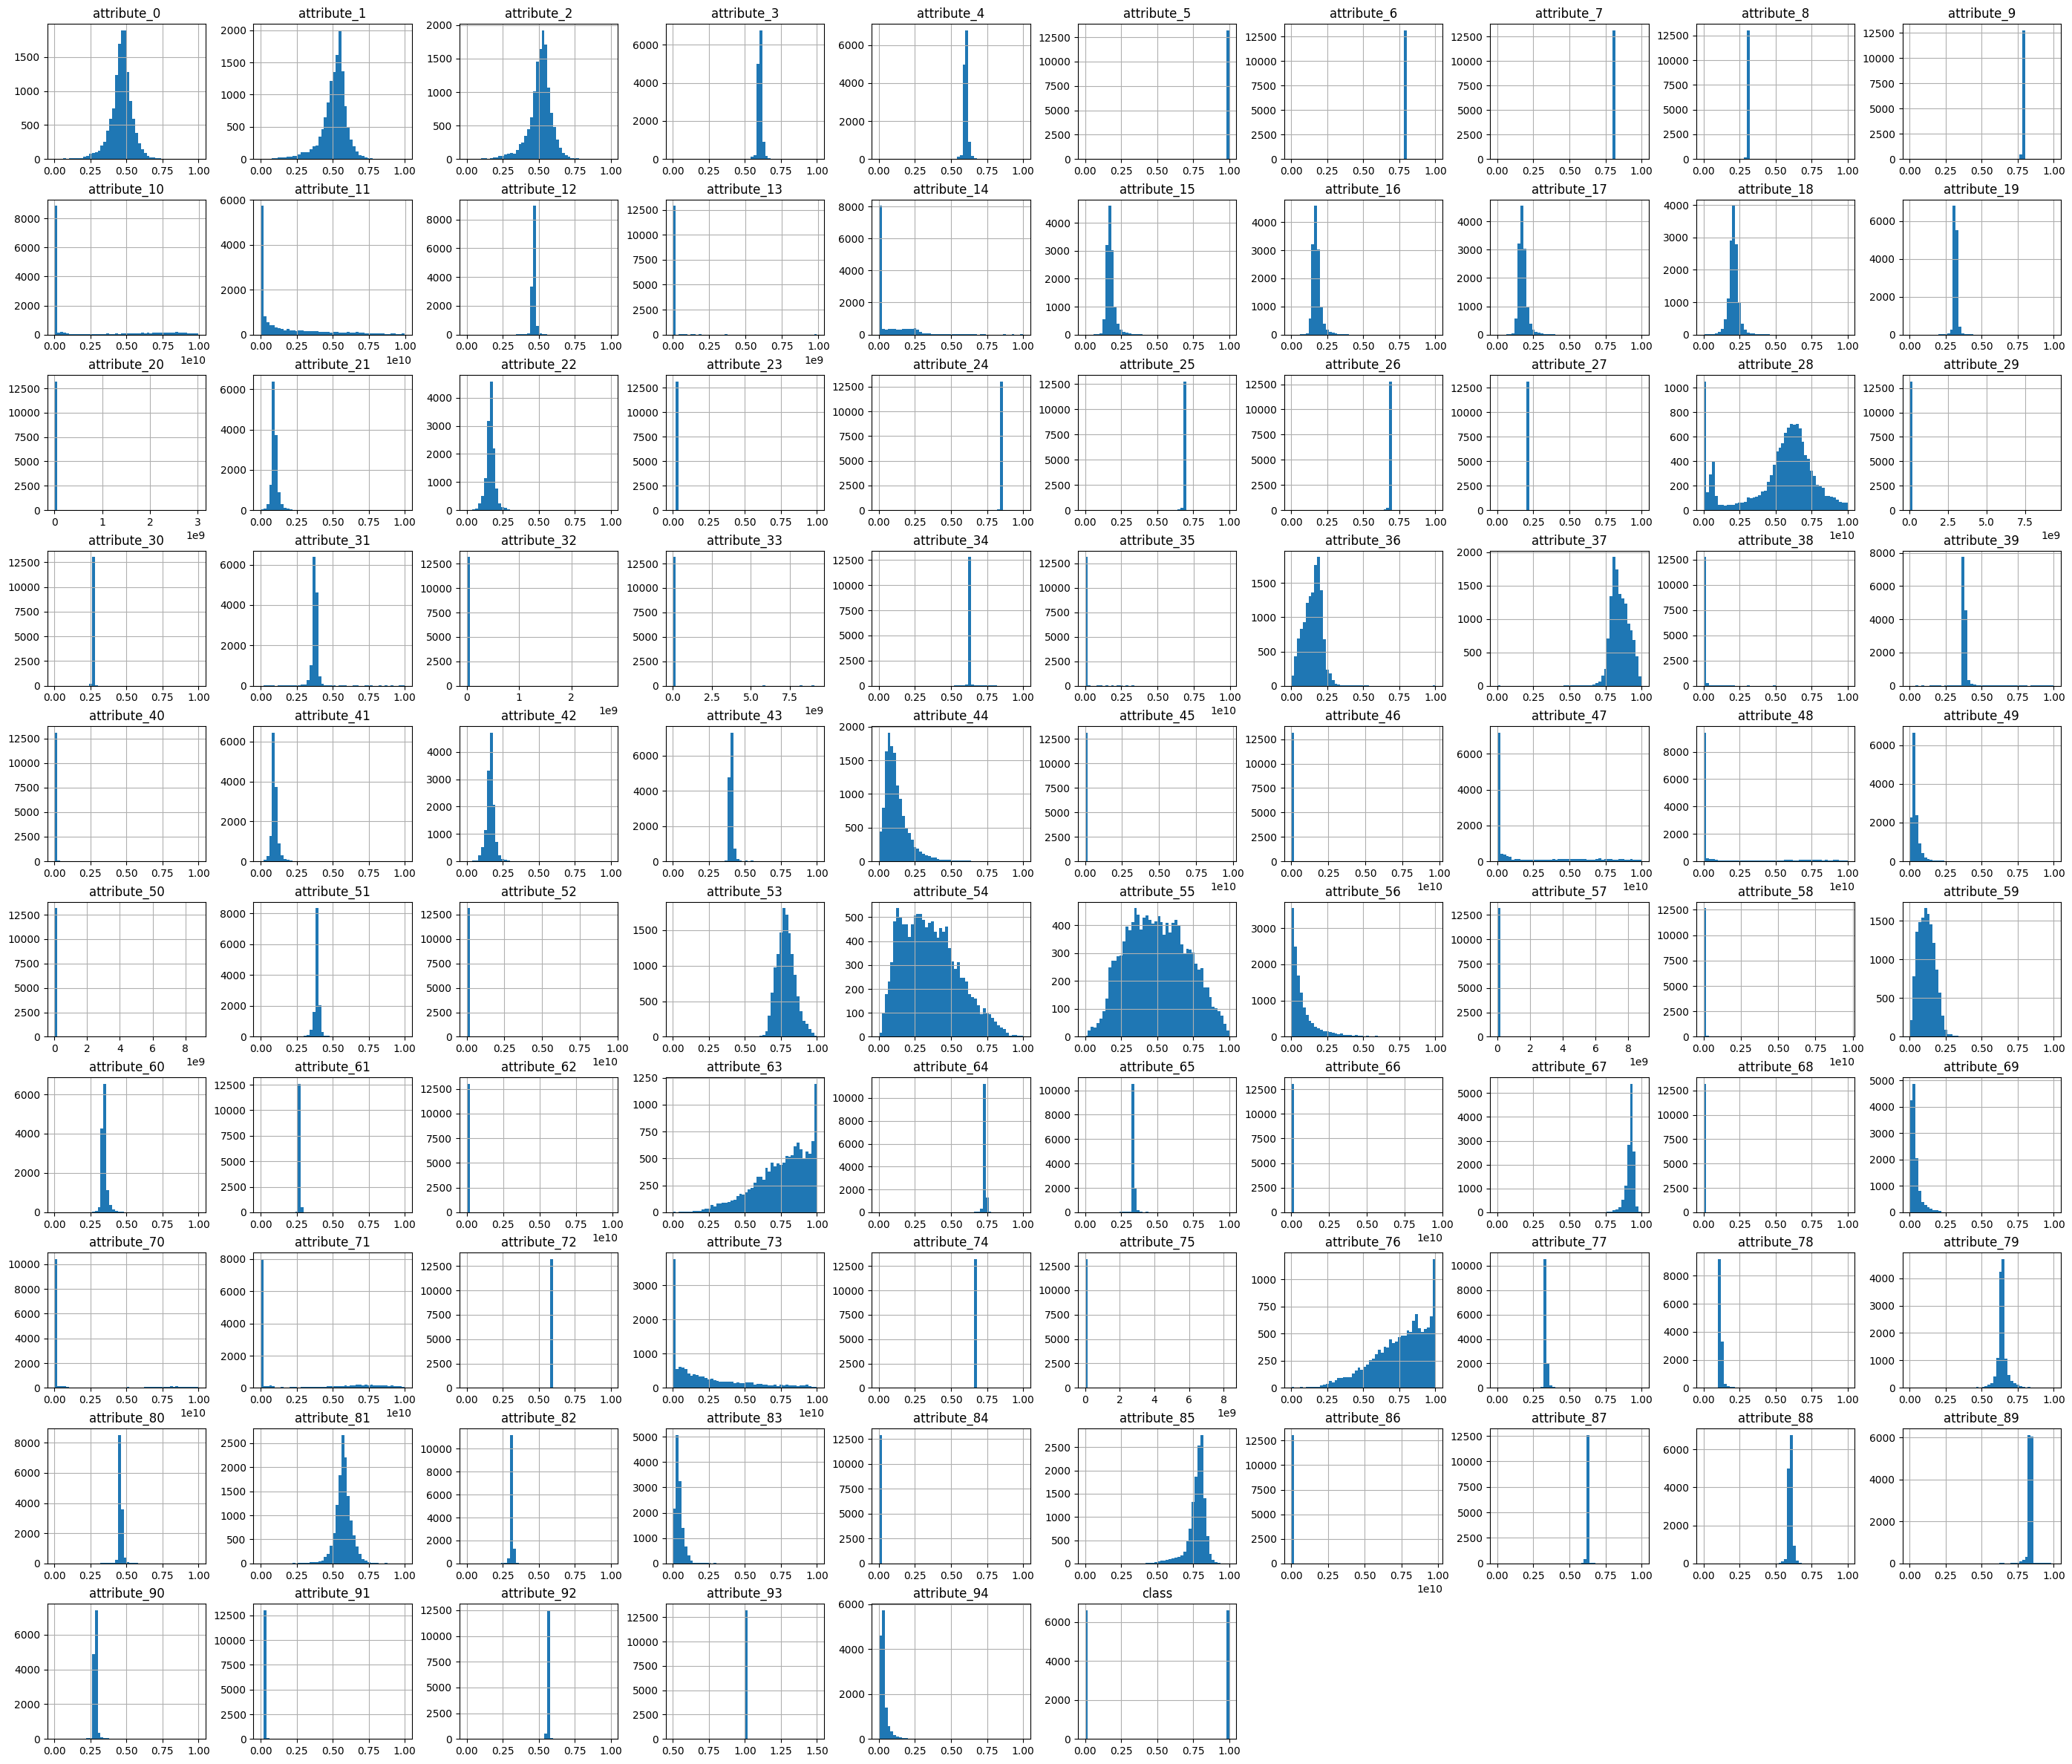

In [9]:
df.hist(figsize=(35,30),bins=50)
plt.show()

In [10]:
y=df['class']
x=df.drop(columns=['class'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
x_train

attribute_0  attribute_1  attribute_2  attribute_3  attribute_4  \
6197      0.506118     0.556912     0.547727     0.615820     0.615820   
3947      0.448106     0.502181     0.509074     0.612491     0.612491   
3495      0.548823     0.598397     0.602120     0.626004     0.626004   
2998      0.495149     0.561328     0.552653     0.631553     0.631553   
3683      0.496856     0.565962     0.551314     0.620779     0.620779   
...            ...          ...          ...          ...          ...   
5477      0.489884     0.547154     0.543552     0.605551     0.605551   
11802     0.436545     0.493030     0.505340     0.595430     0.593926   
499       0.493394     0.542303     0.540232     0.595980     0.595980   
2012      0.531760     0.584660     0.571926     0.620209     0.620209   
9003      0.493001     0.548654     0.542510     0.600103     0.599618   

       attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  ...  \
6197      0.999169     0.797528     0.809401     0.303348     0.781666  ...   
3947      0.998844     0.797248     0.809231     0.303538     0.781482  ...   
3495      0.999198     0.797622     0.809535     0.303452     0.781810  ...   
2998      0.999087     0.797450     0.809380     0.303384     0.781643  ...   
3683      0.998997     0.797482     0.809403     0.303627     0.781668  ...   
...            ...          ...          ...          ...          ...  ...   
5477      0.999015     0.797406     0.809328     0.303456     0.781588  ...   
11802     0.998887     0.797157     0.809114     0.303380     0.781360  ...   
499       0.998980     0.797400     0.809321     0.303521     0.781581  ...   
2012      0.999146     0.797746     0.809575     0.303778     0.781825  ...   
9003      0.999007     0.797333     0.809297     0.303367     0.781520  ...   

       attribute_85  attribute_86  attribute_87  attribute_88  attribute_89  \
6197       0.810229      0.000662      0.623844      0.615818      0.840996   
3947       0.778887      0.000600      0.623891      0.612490      0.839111   
3495       0.836625      0.001149      0.624599      0.626005      0.842076   
2998       0.807956      0.000484      0.623775      0.631551      0.841233   
3683       0.815290      0.000347      0.623978      0.620777      0.841302   
...             ...           ...           ...           ...           ...   
5477       0.801476      0.000199      0.623647      0.605547      0.840490   
11802      0.773124      0.142207      0.623683      0.600891      0.838178   
499        0.800971      0.010118      0.626249      0.595978      0.840470   
2012       0.825597      0.000398      0.624772      0.620209      0.841523   
9003       0.782331      0.003065      0.630282      0.600692      0.838608   

       attribute_90  attribute_91  attribute_92  attribute_93  attribute_94  
6197       0.277714      0.026863      0.565477             1      0.042154  
3947       0.275917      0.026790      0.565152             1      0.088594  
3495       0.275281      0.026791      0.565158             1      0.171601  
2998       0.282382      0.027395      0.566991             1      0.022803  
3683       0.277464      0.026791      0.565158             1      0.045017  
...             ...           ...           ...           ...           ...  
5477       0.279797      0.027519      0.567214             1      0.029153  
11802      0.285045      0.026623      0.564071             1      0.016781  
499        0.280401      0.027180      0.566513             1      0.027156  
2012       0.275273      0.026791      0.565158             1      0.173924  
9003       0.290227      0.027937      0.568626             1      0.016490  

[10559 rows x 95 columns]

In [12]:
x_test.shape

(2640, 95)

In [13]:
y_train

6197     0
3947     0
3495     0
2998     0
3683     0
        ..
5477     0
11802    1
499      0
2012     0
9003     1
Name: class, Length: 10559, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5,min_samples_leaf=3,min_samples_split=4)
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

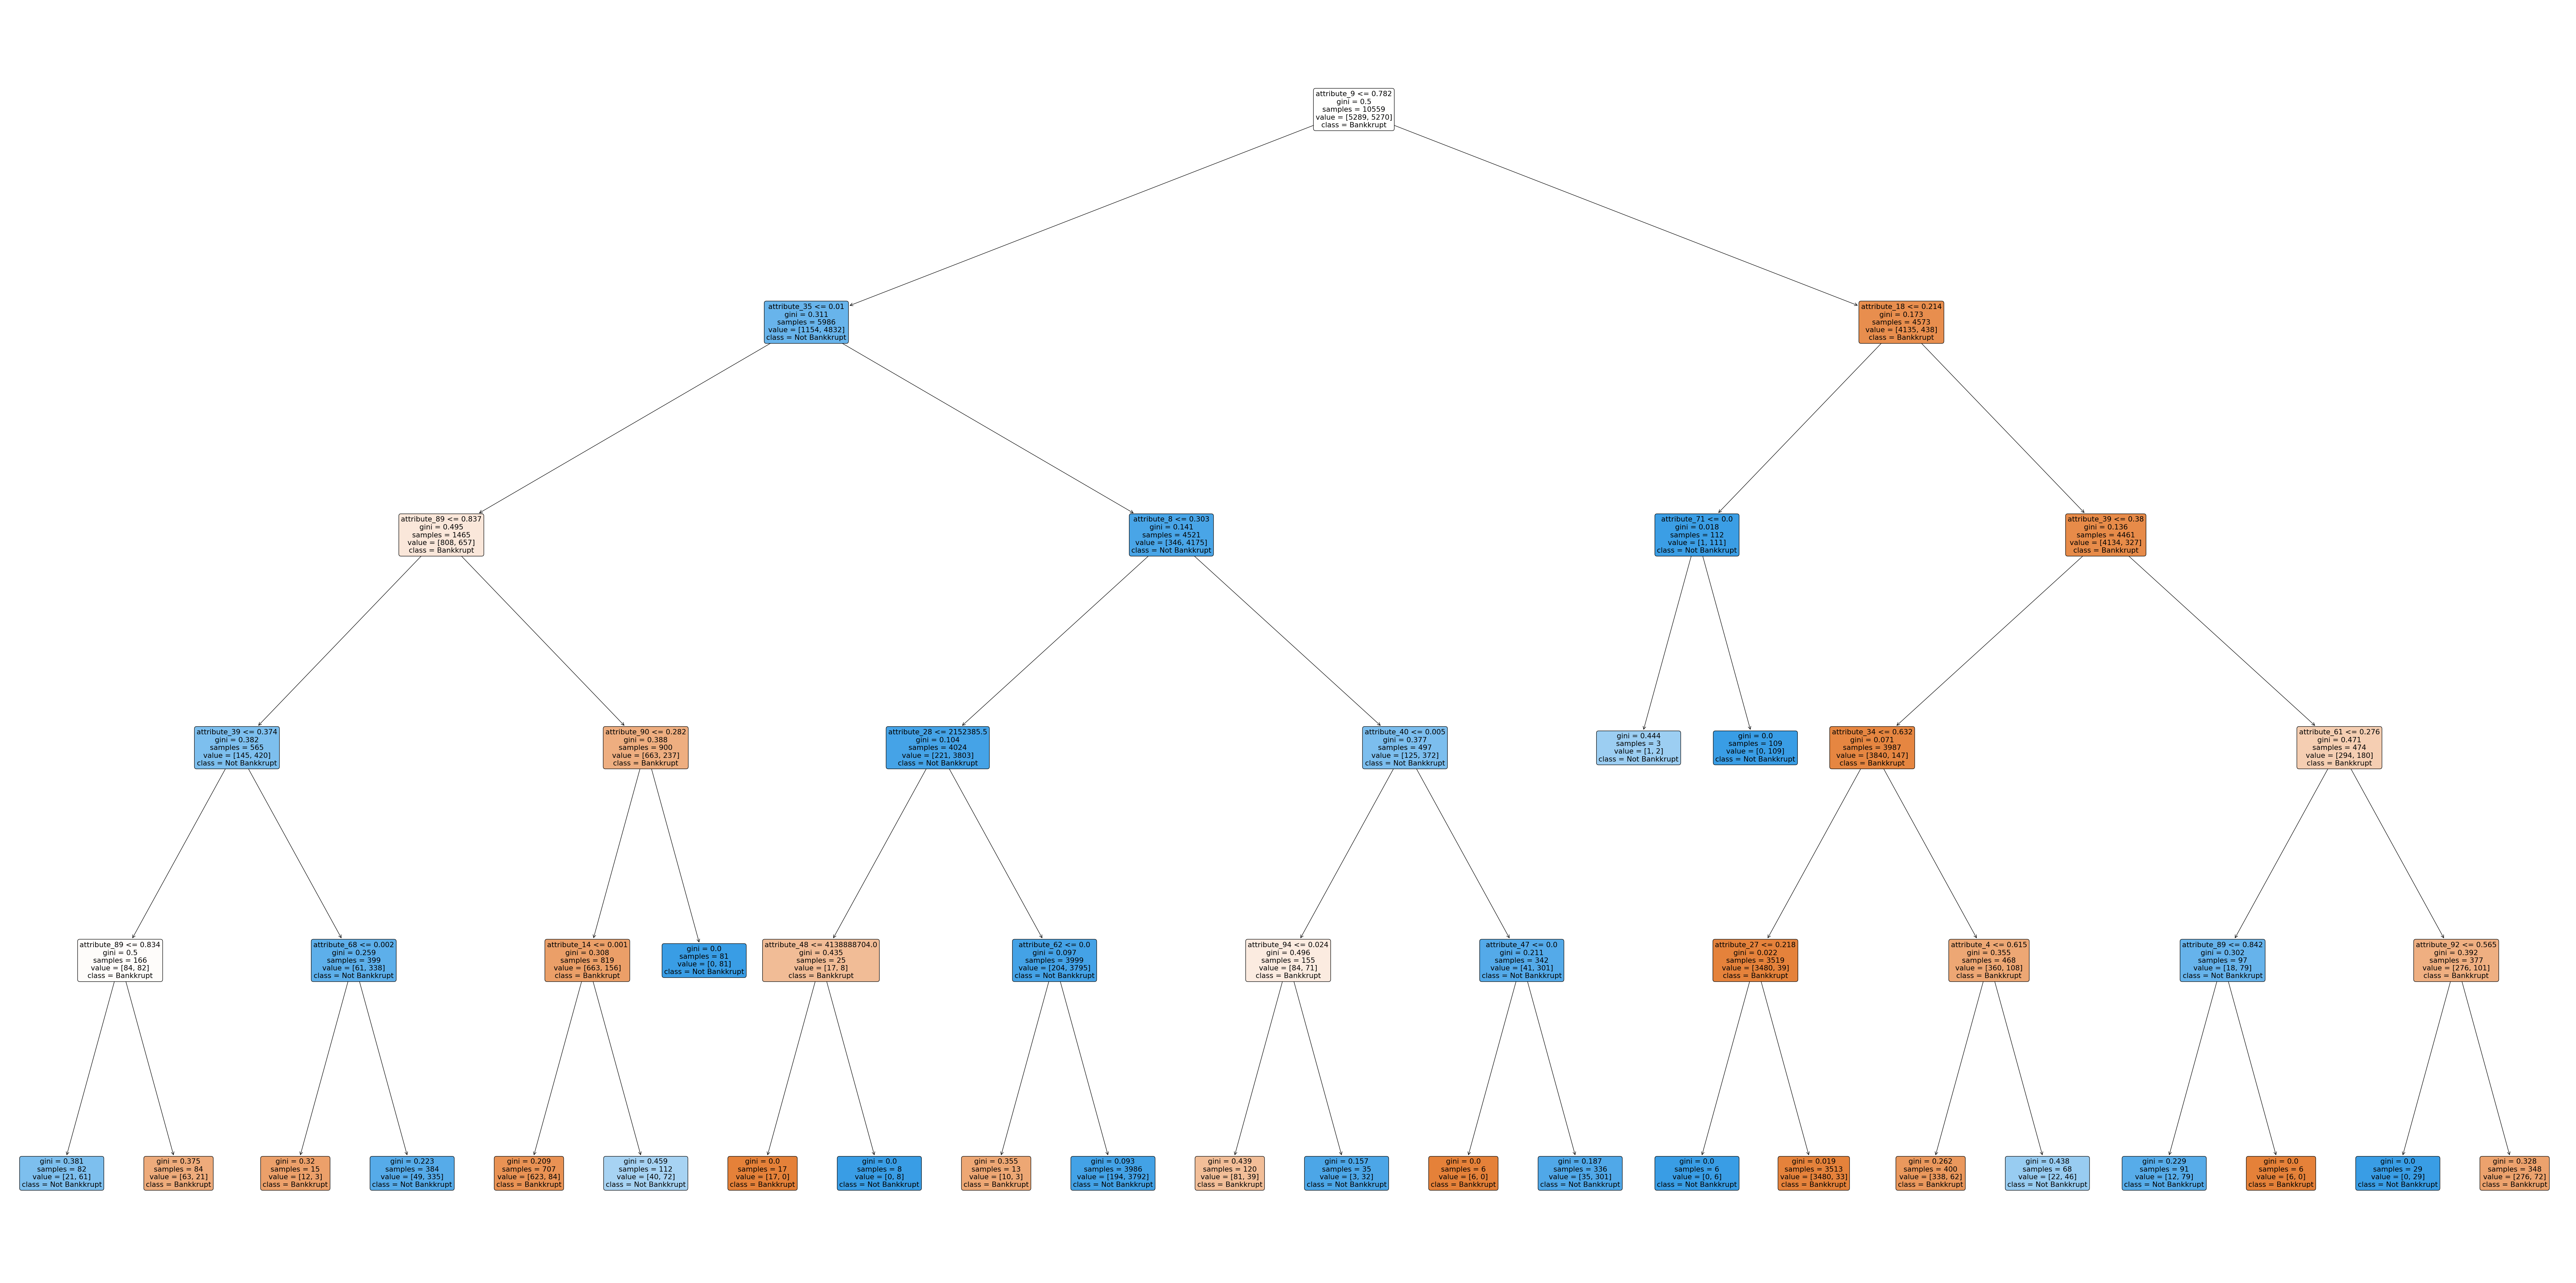

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(100, 50))
plot_tree(dec, feature_names=x_train.columns, class_names=["Bankkrupt", "Not Bankkrupt"], 
          filled=True, rounded=True)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=61,max_depth=10,bootstrap=True)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=61, random_state=42)

In [17]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

sv_clf = SVC(kernel = 'rbf' ,gamma = 0.5 , C= 1.0)
sv_clf.fit(x_train,y_train)


SVC(gamma=0.5)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


res_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall'])


for model in [dec, rf, sv_clf]:
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, zero_division=0)
    precision = precision_score(y_test, predictions,zero_division=0)
    
    res_df[type(model).__name__] = [accuracy, precision, recall]


print("\nResults DataFrame:")
res_df


Results DataFrame:


DecisionTreeClassifier  RandomForestClassifier       SVC
Accuracy                 0.922727                0.962121  0.516288
Precision                0.912152                0.939914  0.510165
Recall                   0.936842                0.987970  1.000000

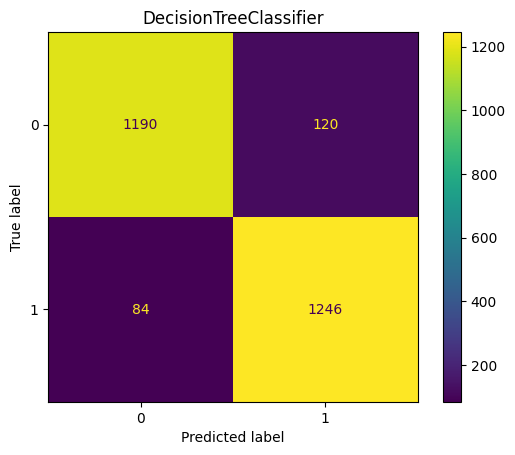

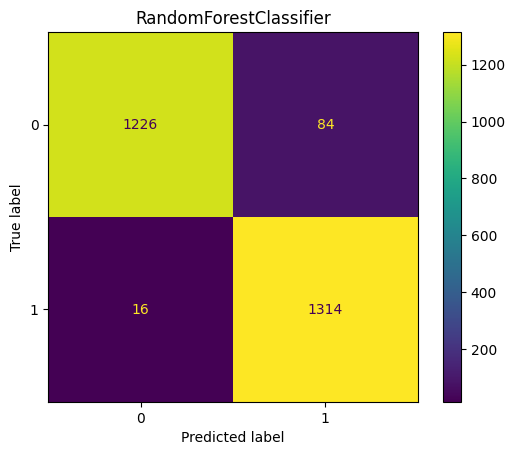

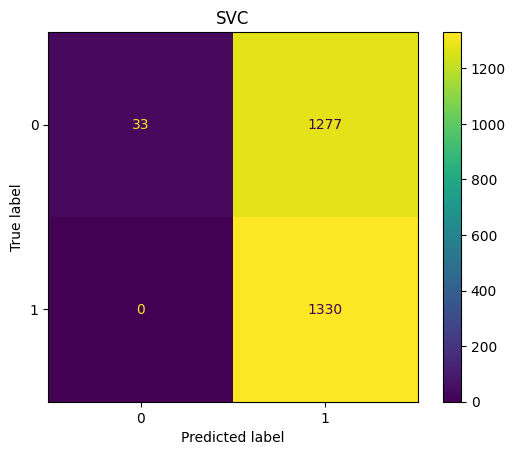

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
l1 = [dec,rf,sv_clf]
sensitivity=list()
specificity=list()
for model in l1:
    cm = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
    tp=cm[1][1]
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    sensitivity.append(tp/(tp+fn))
    specificity.append(tn/(tn+fp))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(type(model).__name__)
    plt.show()  

In [20]:
print(sensitivity)
print(specificity)

[0.9368421052631579, 0.98796992481203, 1.0]
[0.9083969465648855, 0.9358778625954198, 0.025190839694656488]


In [21]:
ss_df=pd.DataFrame([sensitivity,specificity],
               columns=[type(dec).__name__, type(rf).__name__, type(sv_clf).__name__],
                  index=['Sensitivity','Specificity'])
ss_df

DecisionTreeClassifier  RandomForestClassifier       SVC
Sensitivity                0.936842                0.987970  1.000000
Specificity                0.908397                0.935878  0.025191

In [22]:
from sklearn.metrics import roc_curve
import plotly.graph_objects as go


for model in [dec, rf]:
    y_scores = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    trace0 = go.Scatter(
        x=fpr,
        y=tpr,
        mode='lines',
        name='ROC curve'
    )

    n = 10  
    indices = np.arange(len(thresholds)) % n == 0

    trace1 = go.Scatter(
        x=fpr[indices], 
        y=tpr[indices], 
        mode='markers+text', 
        name='Threshold points', 
        text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
        textposition='top center'
    )


    trace2 = go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        mode='lines', 
        name='Random (Area = 0.5)', 
        line=dict(dash='dash')
    )

    data = [trace0, trace1, trace2]

    layout = go.Layout(
        title='Receiver Operating Characteristic',
        xaxis=dict(title='False Positive Rate'),
        yaxis=dict(title='True Positive Rate'),
        autosize=False,
        width=800,
        height=800,
        showlegend=False
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()